<a href="https://colab.research.google.com/github/VINCENGUYEN-JS/Compose-layout/blob/main/09_T5_CNN_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install tensorflow


## CNN images
- https://github.com/AdTekDev/EmT.DS/raw/main/EmT%20Test%2001/Set_A.zip
- https://www.tensorflow.org/tutorials/images/classification

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import pathlib

import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [5]:
import pathlib

dataset_url = "https://github.com/AdTekDev/EmT.DS/raw/main/EmT%20Test%2001/Set_A.zip"
data_dir = tf.keras.utils.get_file('Set_A.zip', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')
data_dir

9026804/9026804 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


PosixPath('/root/.keras/datasets/Set_A')

In [ ]:
!  ls  /root/.keras/datasets/Set_A/Train/

'13 - Hoa oi'	'19 - Hoa Phao Bong'  '6 - Hoa do quyen'
'16 - Hoa ban'	'3 - Hoa mai'	      '9 - Hoa sung'


In [6]:
image_count = len(list(data_dir.glob('Train/*/*.jpg')))
print(image_count)

49


In [7]:
list(data_dir.glob('Train/*/*.jpg'))

[PosixPath('/root/.keras/datasets/Set_A/Train/9 - Hoa sung/Hoa sung 002.jpg'),
 PosixPath('/root/.keras/datasets/Set_A/Train/9 - Hoa sung/Hoa sung 003.jpg'),
 PosixPath('/root/.keras/datasets/Set_A/Train/9 - Hoa sung/Hoa sung 001.jpg'),
 PosixPath('/root/.keras/datasets/Set_A/Train/9 - Hoa sung/Hoa sung 004.jpg'),
 PosixPath('/root/.keras/datasets/Set_A/Train/9 - Hoa sung/Hoa sung 007.jpg'),
 PosixPath('/root/.keras/datasets/Set_A/Train/19 - Hoa Phao Bong/Hoa Thien Phuc 007.jpg'),
 PosixPath('/root/.keras/datasets/Set_A/Train/19 - Hoa Phao Bong/Hoa Thien Phuc 003.jpg'),
 PosixPath('/root/.keras/datasets/Set_A/Train/19 - Hoa Phao Bong/Hoa Thien Phuc 002.jpg'),
 PosixPath('/root/.keras/datasets/Set_A/Train/19 - Hoa Phao Bong/Hoa Thien Phuc 006.jpg'),
 PosixPath('/root/.keras/datasets/Set_A/Train/19 - Hoa Phao Bong/Hoa Thien Phuc 001.jpg'),
 PosixPath('/root/.keras/datasets/Set_A/Train/19 - Hoa Phao Bong/Hoa Thien Phuc 005.jpg'),
 PosixPath('/root/.keras/datasets/Set_A/Train/19 - Hoa Phao

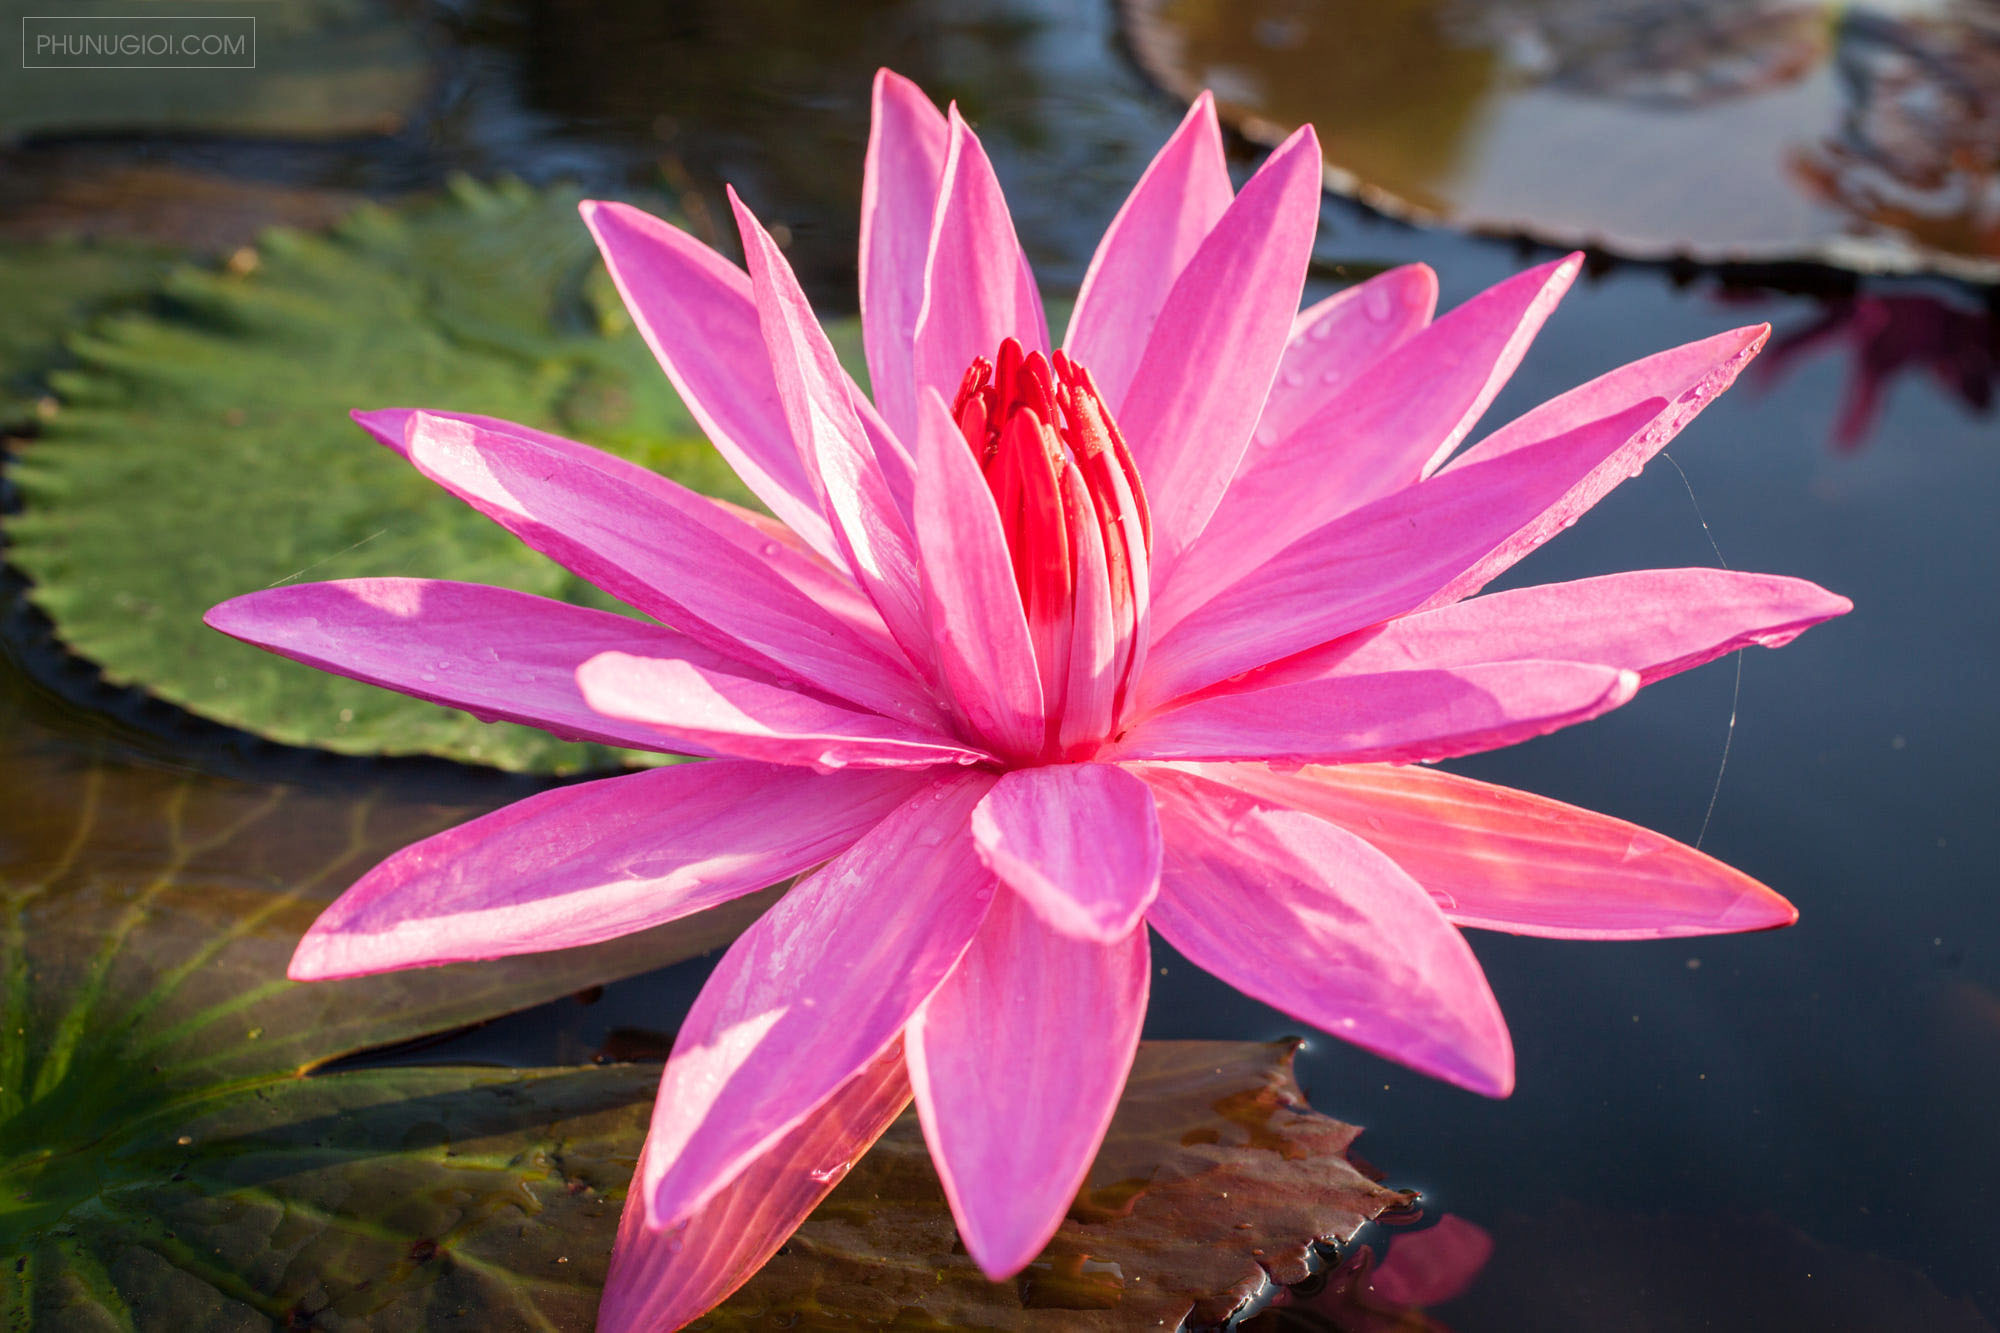

In [9]:
flowers = list(data_dir.glob('Train/*/*'))
PIL.Image.open(str(flowers[0]))

In [10]:
str(flowers[0])

'/root/.keras/datasets/Set_A/Train/9 - Hoa sung/Hoa sung 002.jpg'

In [13]:
batch_size = 8
img_height = 180
img_width = 180

In [ ]:
# trainPath = C:/Users/tunn7/.keras/datasets/Set_A/Train

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir.joinpath("Train") ,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 49 files belonging to 6 classes.
Using 40 files for training.


In [15]:
class_names = train_ds.class_names
class_names

['13 - Hoa oi',
 '16 - Hoa ban',
 '19 - Hoa Phao Bong',
 '3 - Hoa mai',
 '6 - Hoa do quyen',
 '9 - Hoa sung']

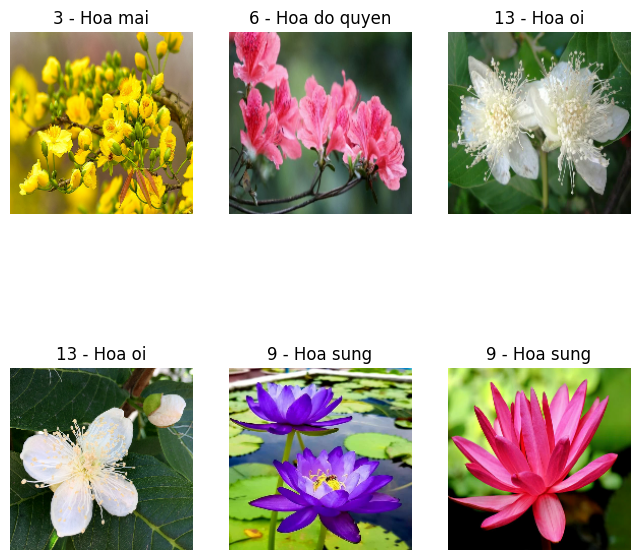

In [16]:
plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [24]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(8, 180, 180, 3)
(8,)


In [25]:
normalization_layer = layers.Rescaling(1./255)

In [26]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

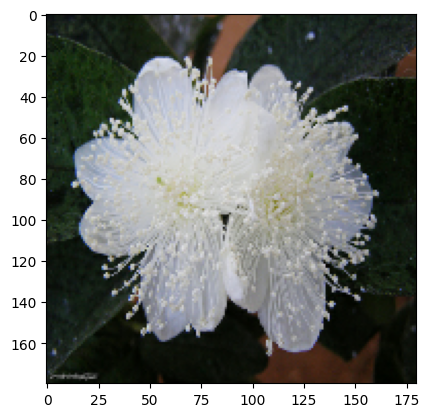

In [20]:
plt.imshow(image_batch[0].numpy().astype("uint8"))
plt.show()

In [ ]:
image_batch.shape, labels_batch.shape

(TensorShape([8, 180, 180, 3]), TensorShape([8]))

In [27]:
## model

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir.joinpath("Train"),
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 49 files belonging to 6 classes.
Using 9 files for validation.


In [28]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

NameError: name 'val_ds' is not defined

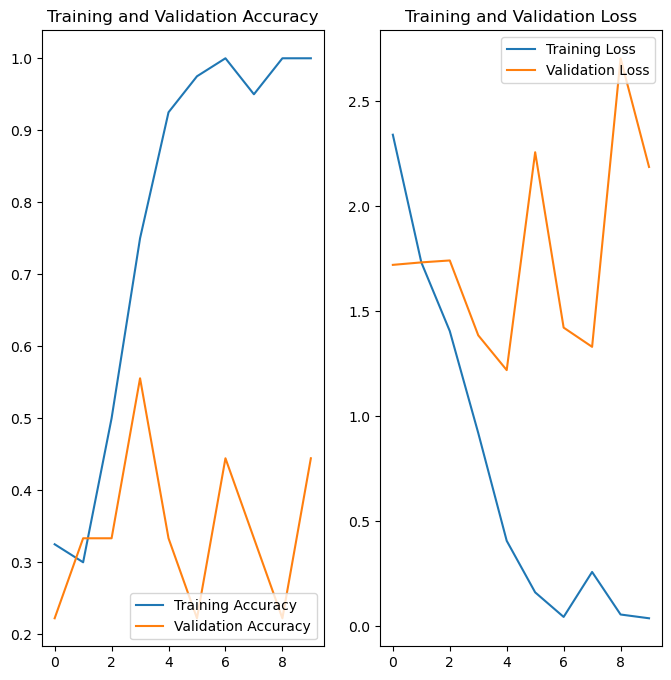

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
## Predict



In [ ]:
testlist = list(data_dir.glob('Test/*.jpg'))
print(testlist[0])

C:\Users\tunn7\.keras\datasets\Set_A\Test\0_HoaSen.jpg


In [ ]:

i = 6
sunflower_path = testlist[i]

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
predictions , testlist[i], score

1/1 [==============================] - 0s 23ms/step
This image most likely belongs to 16 - Hoa ban with a 54.81 percent confidence.


(array([[ 1.9726079 ,  4.355743  ,  3.693315  , -0.3956981 ,  2.7435489 ,
         -0.40727472]], dtype=float32),
 WindowsPath('C:/Users/tunn7/.keras/datasets/Set_A/Test/15_Lan hac vy 012.jpg'),
 <tf.Tensor: shape=(6,), dtype=float32, numpy=
 array([0.05056811, 0.54809916, 0.28259882, 0.00473516, 0.10931811,
        0.00468066], dtype=float32)>)